## CARGO AND PARCELS

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/russian-passenger-air-service-20072020/russian_passenger_air_service_2.csv
/kaggle/input/russian-passenger-air-service-20072020/russian_air_service_CARGO_AND_PARCELS.csv


In [60]:
data = pd.read_csv('/kaggle/input/russian-passenger-air-service-20072020/russian_air_service_CARGO_AND_PARCELS.csv')
data_1 = pd.read_csv('/kaggle/input/russian-passenger-air-service-20072020/russian_passenger_air_service_2.csv')
print(data.head())
print(data_1.head())

      Airport name  Year  January  February  March  April  May  June  July  \
0           Abakan  2020    43.58       0.0    0.0    0.0  0.0   0.0   0.0   
1           Aikhal  2020     0.00       0.0    0.0    0.0  0.0   0.0   0.0   
2             Loss  2020     0.00       0.0    0.0    0.0  0.0   0.0   0.0   
3          Amderma  2020     0.00       0.0    0.0    0.0  0.0   0.0   0.0   
4  Anadyr (Carbon)  2020   122.00       0.0    0.0    0.0  0.0   0.0   0.0   

   August  September  October  November  December  Whole year  \
0     0.0        0.0      0.0       0.0       0.0         0.0   
1     0.0        0.0      0.0       0.0       0.0         0.0   
2     0.0        0.0      0.0       0.0       0.0         0.0   
3     0.0        0.0      0.0       0.0       0.0         0.0   
4     0.0        0.0      0.0       0.0       0.0         0.0   

                             Airport coordinates  
0   (Decimal('91.399735'), Decimal('53.751351'))  
1  (Decimal('111.543324'), Decimal('65

In [61]:
#check for null values in theCARGO and PARCELS data
data.isna().sum()

Airport name           0
Year                   0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Whole year             0
Airport coordinates    0
dtype: int64

In [62]:
#check for null values in the passenger data
data_1.isna().sum()

Airport name           0
Year                   0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Whole year             0
Airport coordinates    0
dtype: int64

       Whole year
Year             
2016  2326.610103
2017  2649.528356
2018  3093.126129
2019  3046.240120
2020     0.000000
         Whole year
Year               
2016  493087.041096
2017  569056.071918
2018  742697.088710
2019  792942.147410
2020       0.000000


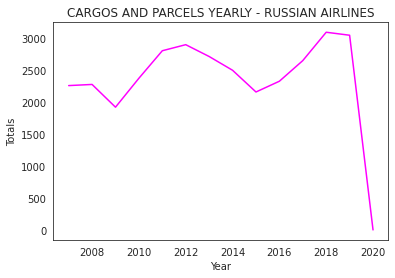

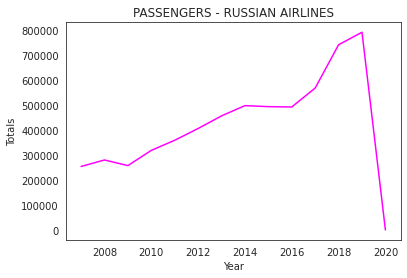

In [63]:
#create a pivot table w/yearly totals for CARGOO/PARCELS data
pivoted_yearly_c = data.pivot_table(index = 'Year', values='Whole year')
print(pivoted_yearly_c.tail())

#create a pivot table w/yearly totals for PASSENGERS data
pivoted_yearly_p = data_1.pivot_table(index = 'Year', values='Whole year')
print(pivoted_yearly_p.tail())

#visualise the yearly totals for both CARGO and PASSENGERS
plt.plot(pivoted_yearly_c, color = 'magenta')
plt.xlabel('Year')
plt.ylabel('Totals')
plt.title('CARGOS AND PARCELS YEARLY - RUSSIAN AIRLINES')
plt.show()

plt.plot(pivoted_yearly_p, color = 'magenta')
plt.xlabel('Year')
plt.ylabel('Totals')
plt.title('PASSENGERS - RUSSIAN AIRLINES')
plt.show()

      Total Cargo
Year             
2007  2258.350103
2008  2276.309795
2009  1920.581404
2010  2373.404041
2011  2803.738733
      Total Passengers
Year                  
2007     254407.993151
2008     280562.743151
2009     257946.027397
2010     318999.160959
2011     359627.027397
      Total Passengers  Total Cargo
Year                               
2007     254407.993151  2258.350103
2008     280562.743151  2276.309795
2009     257946.027397  1920.581404
2010     318999.160959  2373.404041
2011     359627.027397  2803.738733


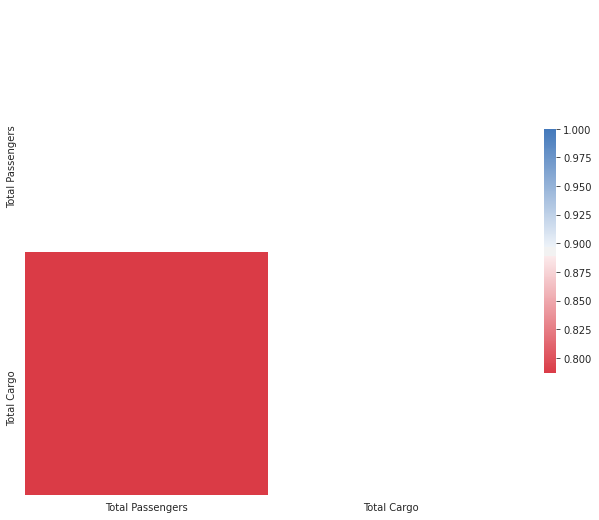

In [64]:
#checking for correlation between the CARGO and PASSENGERS
pivoted_yearly_c.rename(columns={'Year': 'Year', 'Whole year': 'Total Cargo'}, inplace=True)
pivoted_yearly_p.rename(columns={'Year': 'Year', 'Whole year': 'Total Passengers'}, inplace=True)
print(pivoted_yearly_c.head())
print(pivoted_yearly_p.head())

#merge the tables
new_pivot = pd.merge(pivoted_yearly_p, pivoted_yearly_c, how='inner', on=None, left_on=pivoted_yearly_p.index, right_on=pivoted_yearly_c.index,
left_index=True, right_index=False, sort=True)
new_pivot = new_pivot.drop('key_0', axis = 1)
print(new_pivot.head())

# Compute correlations
corr = new_pivot.corr()
# Exclude duplicate correlations by masking upper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')
# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)
# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5})


The line plot shows an almost similar trend in the cargo and passenger numbers with highest peak in 2018/9 in both plots.
Number of passengers and cargo totals have a high correlation as per the heatmap.

In [75]:
#creating a pivot table w/monthly totals
pivot_monthly_c = data.pivot_table(index = 'Year', values = ['January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November', 'December'], aggfunc = sum)
pivot_monthly_c = pivot_monthly_c.drop(2020, axis = 0)  #drop 2020 records.
pivot_monthly_c.loc['Total'] = pivot_monthly_c.sum(axis = 0)    #add the Total index
pivot_monthly_c = pivot_monthly_c.reindex(columns = ['January', 'February', 'March', 'April', 'May',    #reindex the columns
       'June', 'July', 'August', 'September', 'October', 'November', 'December'])


pivot_monthly_p = data_1.pivot_table(index = 'Year', values = ['January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November', 'December'], aggfunc = sum)
pivot_monthly_p = pivot_monthly_p.drop(2020, axis = 0)  #drop 2020 records.
pivot_monthly_p.loc['Total'] = pivot_monthly_p.sum(axis = 0)    #add the Total index
pivot_monthly_p = pivot_monthly_p.reindex(columns = ['January', 'February', 'March', 'April', 'May',   
       'June', 'July', 'August', 'September', 'October', 'November', 'December'])        #reindex the columns
 

print(pivot_monthly_c.tail())
print(pivot_monthly_p.tail())

         January   February      March      April        May       June  \
Year                                                                      
2016    37027.95   45920.32   52682.46   56039.45   52461.46   53173.89   
2017    44991.56   50535.46   68017.79   64988.47   66284.59   63515.38   
2018    49572.67   55449.01   62684.84   62874.95   65109.87   66997.65   
2019    45365.27   51862.55   62132.32   64770.87   60454.37   60775.68   
Total  530850.20  646356.88  763513.86  777944.39  771737.59  757709.25   

            July     August  September    October   November   December  
Year                                                                     
2016    53389.32   58970.38   60919.95   66389.96   67932.38   74462.63  
2017    63616.70   65542.13   66663.90   70297.32   73326.73   76151.11  
2018    63790.77   66193.06   66337.28   69573.46   70467.59   74609.50  
2019    65223.58   65431.94   67362.54   70742.14   73215.60   77269.41  
Total  771631.50  817733.04  8

        January   February      March      April        May       June  \
Year                                                                     
Total  530850.2  646356.88  763513.86  777944.39  771737.59  757709.25   

           July     August  September   October   November   December  
Year                                                                   
Total  771631.5  817733.04  842503.65  890606.6  887011.68  929016.92  


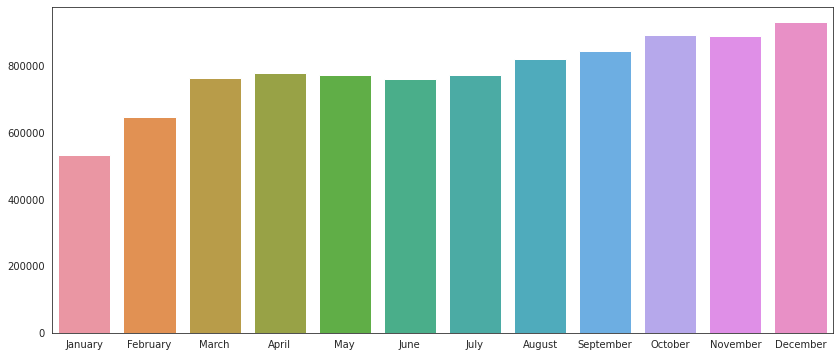

In [79]:
#acessing the totals row and plotting a bar chart
df = pivot_monthly_c.iloc[[13]] 

plt.figure(figsize=(14,6))
sns.barplot(data = df)
print(df)

           January    February        March        April          May  \
Year                                                                    
Total  105847206.0  96227453.0  111738531.0  118897661.0  137685031.0   

              June         July       August    September      October  \
Year                                                                     
Total  165372797.0  189011606.0  193653010.0  168010468.0  141430337.0   

          November   December  
Year                           
Total  119671527.0  929016.92  


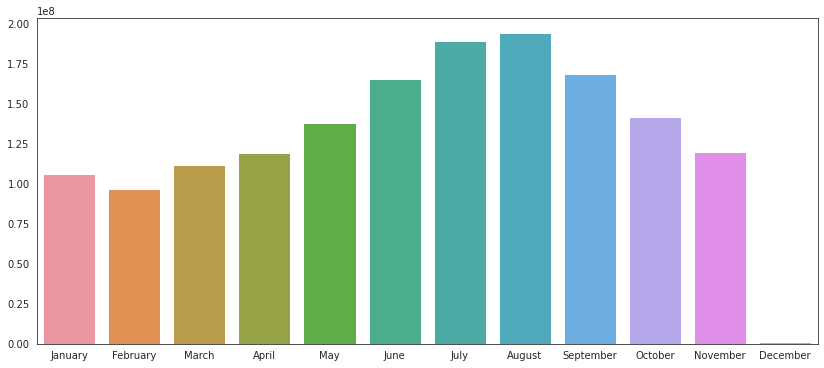

In [80]:
df1 = pivot_monthly_p.iloc[[13]]
print(df1)
plt.figure(figsize=(14,6))
sns.barplot(data = df1)

From the barcharts, numbers along the months between the passengers and cargo are not highly correlated.